<a href="https://colab.research.google.com/github/mamun48/Deep-Learning-Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate data

In [49]:
np.random.seed(0)
x_data = np.random.uniform(-20, 20, 1000)
y_data = 5 * x_data**3 - 8 * x_data**2 - 7 * x_data + 1 + np.random.normal(0, 500, 1000)

# Normalize data

In [50]:
x_data_normalized = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) * 2 - 1


# Split data

In [51]:
train_size = int(0.9 * len(x_data_normalized))
val_size = int(0.05 * len(x_data_normalized))
test_size = len(x_data_normalized) - train_size - val_size

x_train = x_data_normalized[:train_size]
y_train = y_data[:train_size]

x_val = x_data_normalized[train_size:train_size + val_size]
y_val = y_data[train_size:train_size + val_size]

x_test = x_data_normalized[train_size + val_size:]
y_test = y_data[train_size + val_size:]


# Define model

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])


# Display model summary

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                64        
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [54]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


# Train the model

In [55]:

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=1)



Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 235696112.0000 - accuracy: 0.0000e+00 - val_loss: 219959488.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 235636272.0000 - accuracy: 0.0000e+00 - val_loss: 219835600.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 235407264.0000 - accuracy: 0.0000e+00 - val_loss: 219398192.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 234721824.0000 - accuracy: 0.0000e+00 - val_loss: 218216464.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 233058592.0000 - accuracy: 0.0000e+00 - val_loss: 215593232.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 229618224.0000 - accuracy: 0.0000e+00 - val_loss: 210543824.0000 - val_accuracy: 0.0000e+00
Epoch 7/10

# Evaluate on Test Data:

In [56]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


2/2 [==============================] - 0s 10ms/step - loss: 32835650.0000 - accuracy: 0.0000e+00
Test Loss: 32835650.0, Test Accuracy: 0.0


# Predict on Test Data:

In [57]:
y_pred = model.predict(x_test)


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 7ms/step - loss: 32835650.0000 - accuracy: 0.0000e+00
Test Loss: 32835650.0
Test Accuracy: 0.0
2/2 [==============================] - 0s 4ms/step


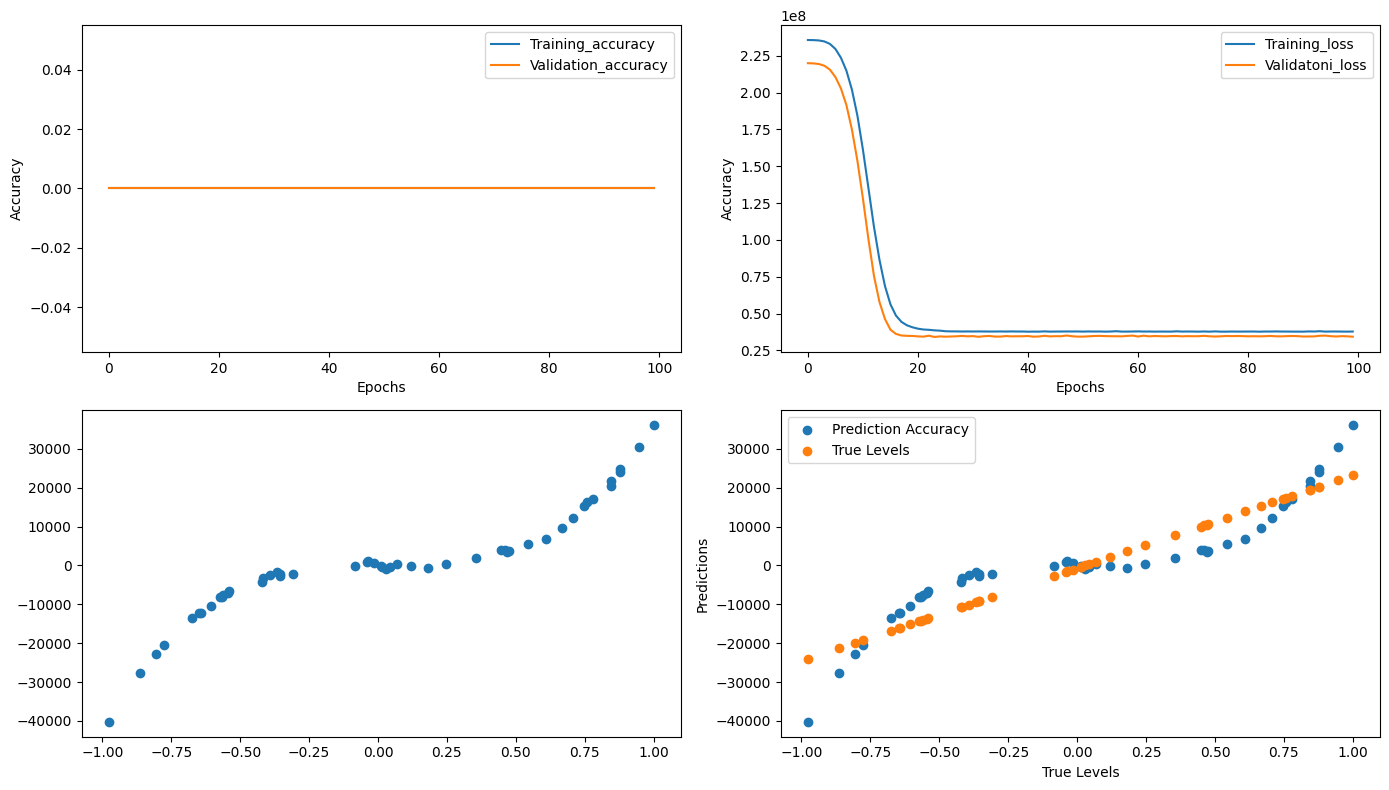

In [58]:
plt.figure(figsize=(14,8))

# Plot Training and Validation Accuracy
plt.subplot(2,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validatoni_loss'])

plt.subplot(2,2,3)
plt.scatter(x_test,y_test)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs true levels
plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.ylabel('Predictions')
plt.xlabel('True Levels')
plt.legend(['Prediction Accuracy', 'True Levels'])


plt.tight_layout()
plt.show()